# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that was scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

# Import Statements

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [39]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [40]:
data = pd.read_csv('cost_revenue.csv')

# Explore and Clean the Data

In [41]:
data.shape

(5391, 6)

In [42]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3972,4996,9/9/2011,Kevin Hart: Laugh at My Pain,"$750,000","$7,712,436","$7,706,436"
1551,3382,12/19/2000,The Gift,"$10,000,000","$44,567,606","$12,008,642"
4650,1054,8/8/2014,Into the Storm,"$50,000,000","$156,602,194","$47,602,194"
5325,2301,2/24/2017,Bitter Harvest,"$21,000,000","$606,162","$557,241"
1615,3170,5/10/2001,Max Keeble's Big Move,"$12,000,000","$17,292,381","$17,292,381"


In [43]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


### Handling Missing Values

In [44]:
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [45]:
print(f'Any duplicates? {data.duplicated().values.any()}')

duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Any duplicates? False
Number of duplicates: 0


### Data Type Conversions

Converting the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [46]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

Converting the `Release_Date` column to a Pandas Datetime type. 

In [47]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

We can ask ourselves some questions like:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [49]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


The average film costs about $31m to make and makes around 3x that (or ~$89m) in worldwide revenue.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is $5 million and they only bring in $3.8m in worldwide revenue!

The minimum domestic and worldwide revenue is $0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was $425,000,000 and the highest worldwide revenue was $2,783,918,982. $2.7 Billion revenue!

In [50]:
(data[data.USD_Production_Budget == data.USD_Production_Budget.min()])

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


The not so famous `My Date With Drew` looks like a real money maker. It grossed $181,041 with a measly $1,100 budget. Resulted in a high return on investment!

In [51]:
data[data.USD_Production_Budget == data.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Zero Revenue Films

#### How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [52]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


We see that there are 512 films in the dataset that had no revenue in the United States. Some international films were never screened in the United States.  In fact, we can see that "Don Gato, el inicio de la pandilla" made about $4.5 million dollars in the box office, but nothing in the United States. Perhaps they should have screened it there too, considering it cost $80 million to make!<br> However, the highest budget films with no revenue have a release date AFTER the date on which the dataset was compiled (May 1st, 2018).

#### How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [53]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


#### Movies with zero domestic revenue but with the worldwide revenue not as zero.

In [54]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

In [55]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [56]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [57]:
# exclude future releases
data_clean = data.drop(future_releases.index)


There are a total of 7 unreleased films at the time of data collection included in the dataset. From this point on, we'll work with another DataFrame called data_clean that does not include these films.

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [58]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

In both cases, we see that a whopping 37.2% of films do not recoup their production budget at the box office. This just goes to show that Film finance could be so risky!

# Budget Visualization

### Budget vs. Revenue - Bubble Charts

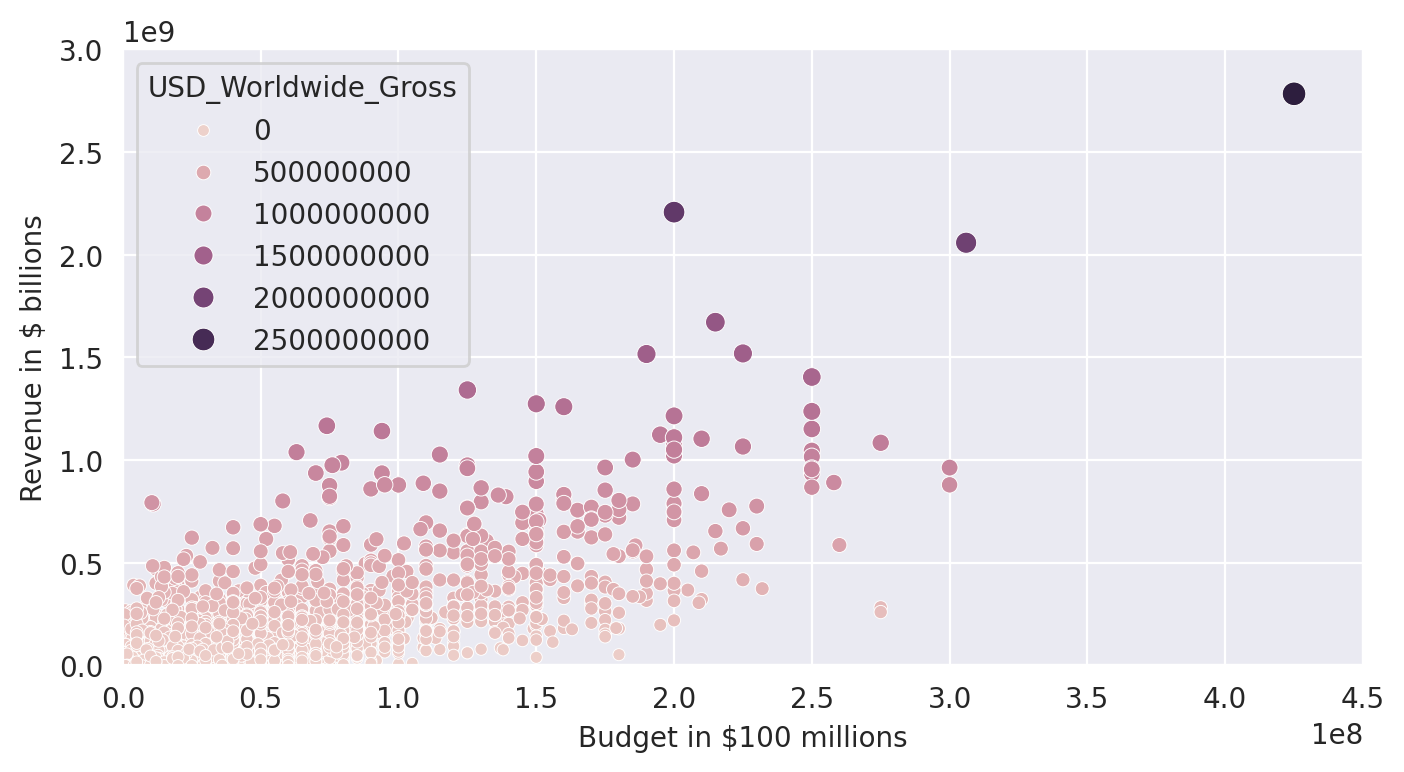

In [59]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Movies Releases over Time

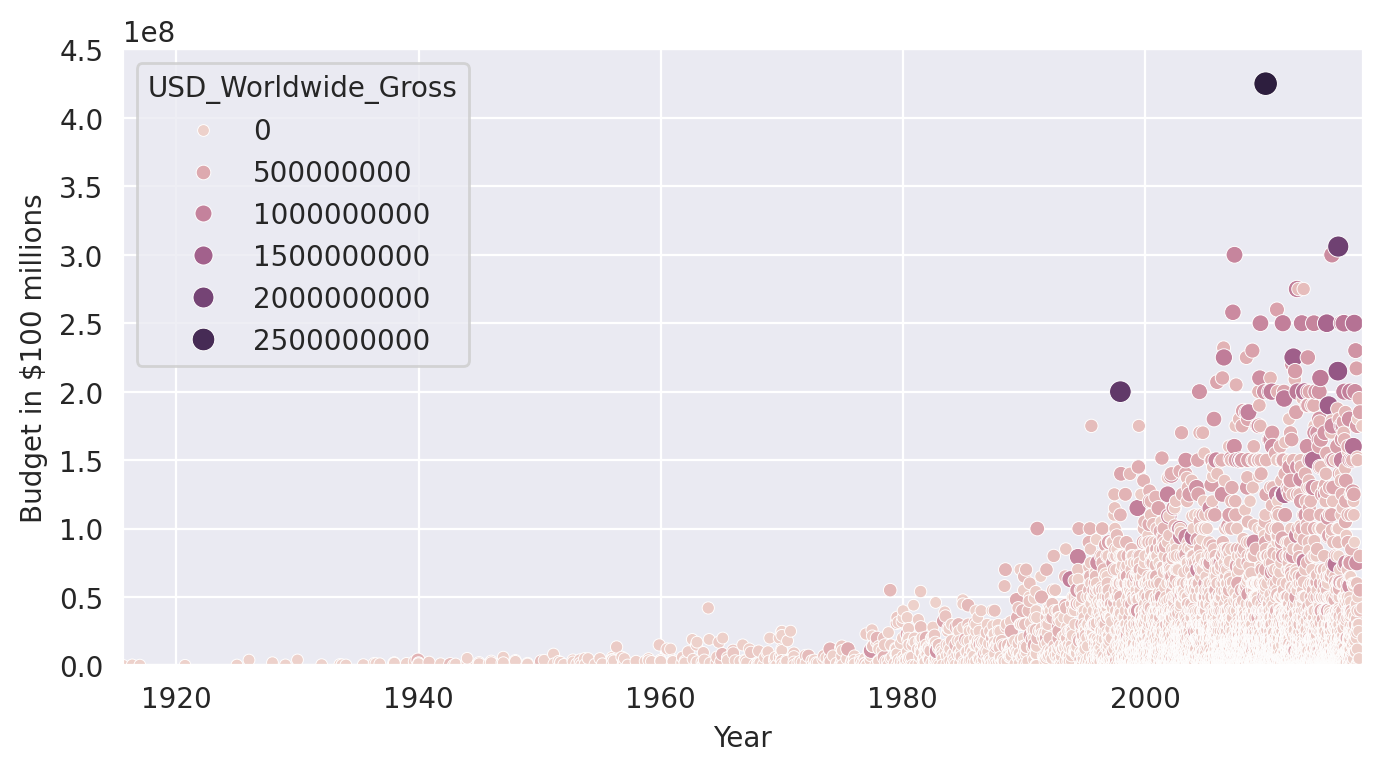

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=data_clean,
        x="Release_Date",
        y="USD_Production_Budget",
        hue="USD_Worldwide_Gross",
        size="USD_Worldwide_Gross",
    )

    ax.set(
        ylim=(0, 450000000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        xlabel="Year",
        ylabel="Budget in $100 millions",
    )

What do we observe?<br><br> First off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the `1980`s onwards and continued to grow through the `2000`s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Separating the "old" (before 1969) and "New" (1970s onwards) Films

* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [61]:
#Converting Years to Decades
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

decades = years//10*10
data_clean['Decade'] = decades

In [62]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [63]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


 DataFrame we see that it only includes 153 films. As we saw in the bubble chart, the bulk of films in the dataset have been released in the last 30 years.

In [64]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


The most expensive film prior to 1970 was Cleopatra, with a production budget of $42 million. That's some serious 1960s money, and judging by the trailer, a lot of it went into extravagant costumes, set design, and plenty of extras. Impressive.

# Relationship b/w `Movie Budget` and the `Worldwide Revenue` - Regression Plots

### Old Movies' Regression plot

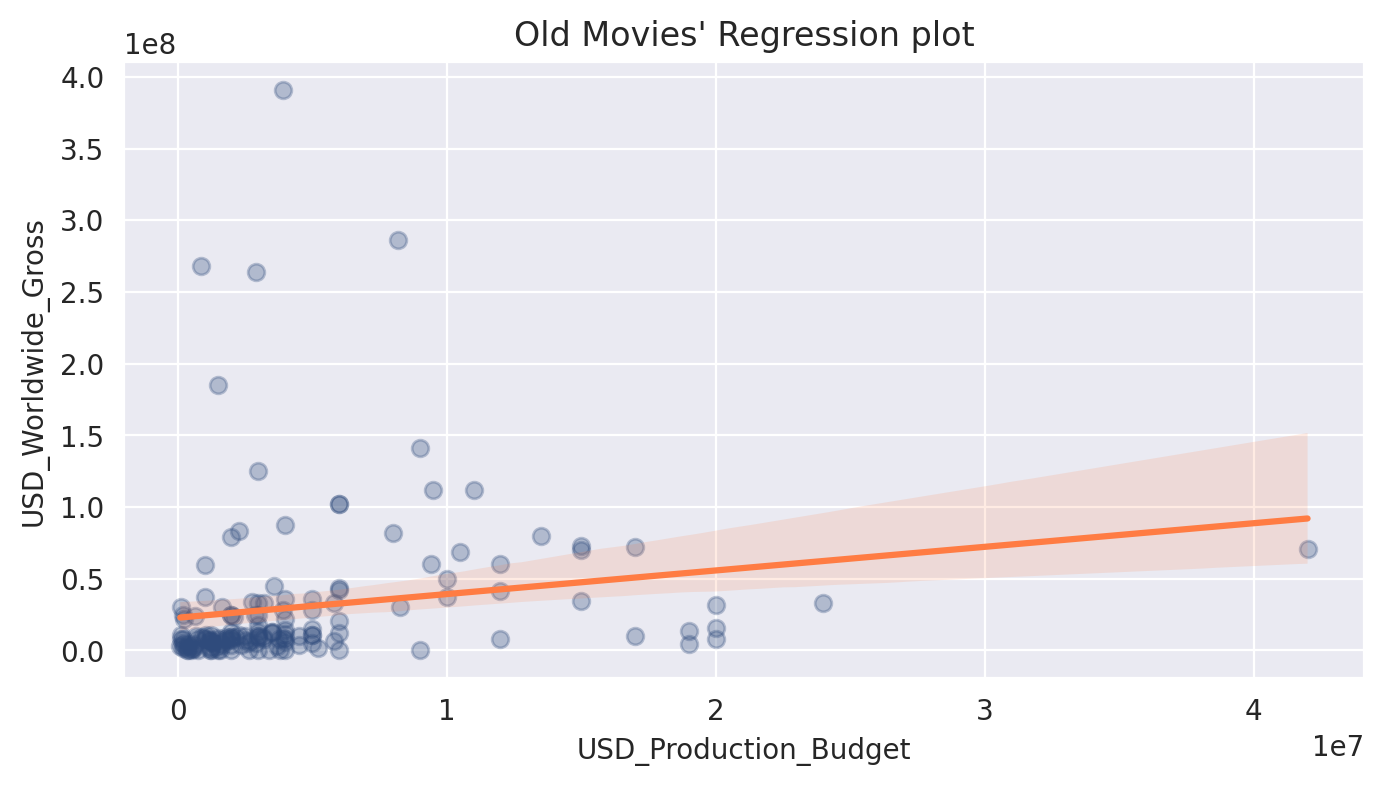

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(
        data=old_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        color="#2f4b7c",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "#ff7c43"},
    )

    ax.set(title="Old Movies' Regression plot")

What do we see here? <br><br>Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!



### New Movies' Regression plot

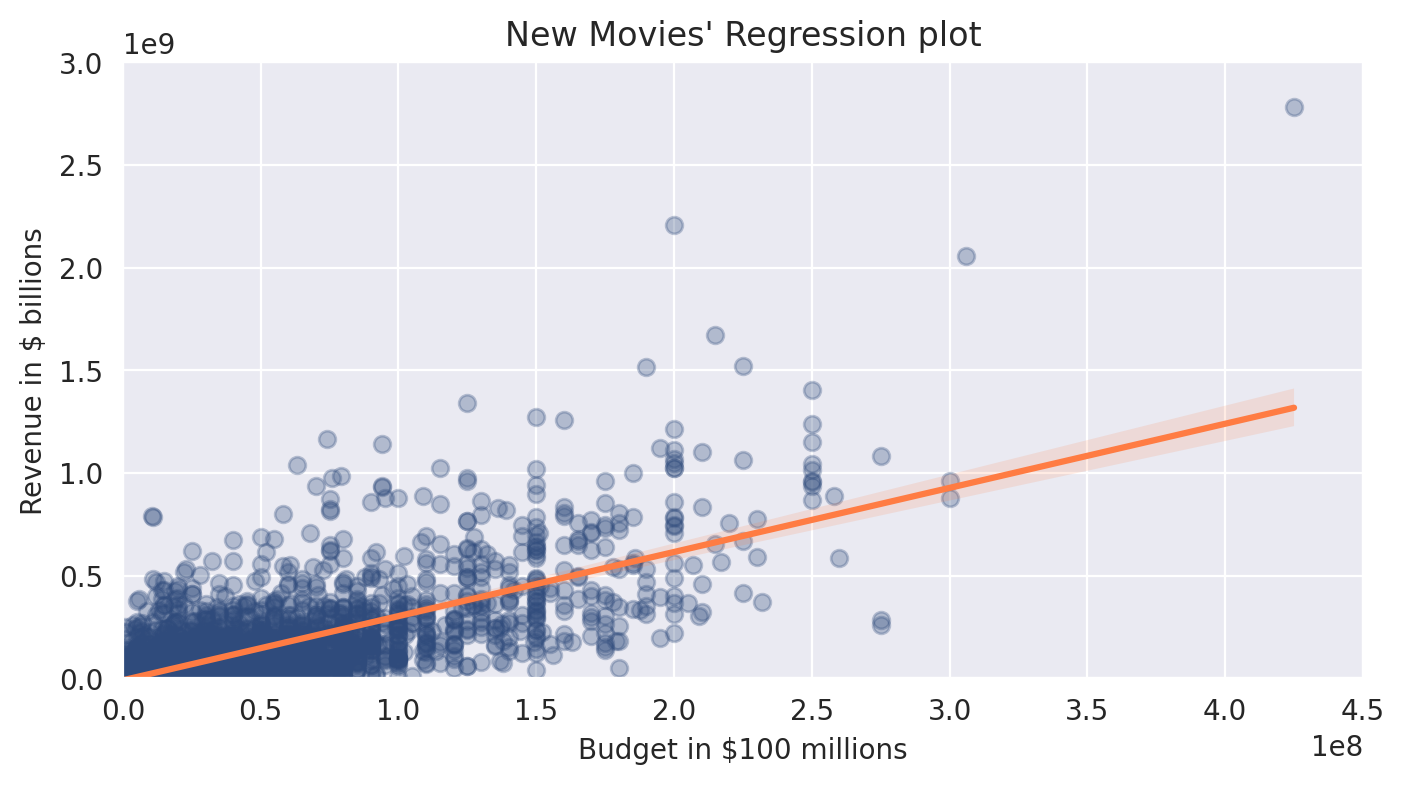

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(
        data=new_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        color="#2f4b7c",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "#ff7c43"},
    )

    ax.set(
        ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel="Revenue in $ billions",
        xlabel="Budget in $100 millions",
        title="New Movies' Regression plot",
    )

We can observe:<br><br>
This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line. Also, the confidence interval is much narrower with a bit of heteroscedasticity. We also see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line.<br><br>
All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

# Linear Regression Model
Our Simple Linear Model:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

## Linear Regression for the `new_films`

In [67]:
# Create regression object
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [68]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [69]:
# Theta zero
print(f"y-Intercept: {regression.intercept_}")

# Theta one
print(f"Coefficient: {regression.coef_}")

# R-squared
print(f"R-squared: {regression.score(X, y)}")

y-Intercept: [-8650768.00661042]
Coefficient: [[3.12259592]]
R-squared: 0.5577032617720403


### Regression coefficient (Slope)

The weight of the budget (slope) tells us that for every extra $1 in the budget, movie revenue increases by $3.1. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

### R-Squared: Goodness of Fit

r-squared = **0.558**. This means that our model explains about `56%` of the variance in movie revenue with only one explanatory variable.

## Linear Regression for the `old_films`

In [70]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The r-squared is: 0.02937258620576877


Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the `slope` is `1.6`, but the `r-squared` is very low (`2.9%`).

# Using Model to Make a Prediction

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Testing:**

How much global revenue does our model estimate for a film with a budget of $350 million? 

In [72]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.


For a `$350` million budget film, our model predicts a worldwide revenue of around `$600` million.